# Import Libraries

In [1]:
import torch
from craft_text_detector import Craft
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Load Model

In [2]:
craft = Craft( crop_type="poly", cuda=True)

c:\Users\Ghost\anaconda3\envs\galli_maps\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\galli_maps\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Fix orientation

In [3]:
def orientation_t(contour):

    centroid = np.mean(contour, axis=0)
    angles = np.arctan2(contour[:, 1] - centroid[1], contour[:, 0] - centroid[0])
    total_angle = np.sum(angles)

    if total_angle > 0:
        return "Anticlockwise"
    elif total_angle < 0:
        return "Clockwise"
    else:
        return "Collinear"

# Example contour points (replace with your contour points)
contour_points = np.array([[1, 2], [4, 6], [7, 8], [3, 4]])

orientation = orientation_t(contour_points)
print(f"The contour is {orientation} with respect to the x-axis.")


The contour is Clockwise with respect to the x-axis.


# Test orientation

In [4]:
def orientation(contour):
    # print(new_contour)
    if np.array_equal(order_contour_clockwise(contour), contour):
        return 'counter_clockwise',order_contour_clockwise(contour)
    elif np.array_equal(order_clockwise(contour), contour) :
        return 'clockwise',order_clockwise(contour)
    else:
        return 'none', order_contour_clockwise(contour)

[[  0 224]
 [208 170]
 [220 216]
 [ 11 270]]
Anticlockwise
[[  0 224]
 [208 170]
 [220 216]
 [ 11 270]]
angle before : 75.51312255859375
angle after : 76.55138494831348


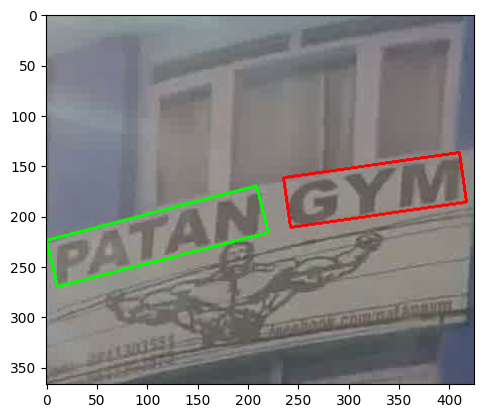

In [5]:
img = cv2.imread('images/odd_5.jpg')
image = img.copy()
boxes = craft.detect_text(img)['boxes']
imgc = img.copy()

angled_boxes = []
for box in boxes:
    if len(box) >= 3:
        # Convert box points to numpy array for easier manipulation
        box_points = np.array(box, dtype=np.int32).reshape(-1, 2)

        # Calculate the centroid of the polygon
        centroid = np.mean(box_points, axis=0)

        # Calculate angles from the centroid to the vertices
        angles = [math.atan2(p[1] - centroid[1], p[0] - centroid[0]) for p in box_points]

        # Calculate average angle
        avg_angle = sum(angles) / len(angles)

        # Determine the threshold based on your specific case
        threshold = math.pi / 4  # 45 degrees

        # Compare the average angle with the threshold to determine orientation
        is_clockwise = avg_angle > threshold

        # If clockwise, reverse the points
        if is_clockwise:
            box_points = box_points[::-1]

        # Calculate the minimum bounding rectangle
        rotated_rect = cv2.minAreaRect(box_points)
        box_vertices = cv2.boxPoints(rotated_rect)
        box_vertices = np.int0(box_vertices)
        angled_boxes.append(box_vertices)

        # Draw the rotated rectangle
        cv2.drawContours(imgc, [box_vertices], 0, (255, 0, 0), 2)

largest_contour = max(angled_boxes, key=cv2.contourArea)
cv2.drawContours(imgc, [largest_contour], 0, (0, 255, 0), 2)

plt.imshow(imgc)

print(largest_contour)
check_orientation = orientation_t(largest_contour)

print(check_orientation)
print(largest_contour)

_,_,angle = cv2.minAreaRect(largest_contour)

print(f'angle before : {angle}')

if angle > 45:
    # angle = angle -  90

    x1, y1 = largest_contour[0]
    x2, y2 = largest_contour[3]
    if x2 - x1 != 0:
        slope = (y2 - y1) / (x2 - x1)
        angle_radians = np.arctan(slope)
        angle = np.degrees(angle_radians)
    else:
        angle = 90

print(f'angle after : {angle}')
height, width = img.shape[:2]
center = (width // 2, height // 2)
imgc = cv2.drawContours(imgc,[largest_contour],0,(0,255,0),2)
if angle !=90:
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
elif angle in range(80,100):
    rotated_image = image.copy()

In [6]:
def clockwise(contour):
    contour = contour.reshape(-1, 2)

    # Calculate the centroid of the contour
    centroid = np.mean(contour, axis=0)

    # Calculate angles from centroid to points
    angles = np.arctan2(contour[:, 1] - centroid[1], contour[:, 0] - centroid[0])

    # Sort points based on angles
    sorted_indices = np.argsort(angles)
    sorted_contour = contour[sorted_indices]

    return sorted_contour

[[  0 224]
 [208 170]
 [220 216]
 [ 11 270]]
[[208 170]
 [220 216]
 [ 11 270]
 [  0 224]]
angle before : 75.51312255859375
angle after : -14.55357279071255


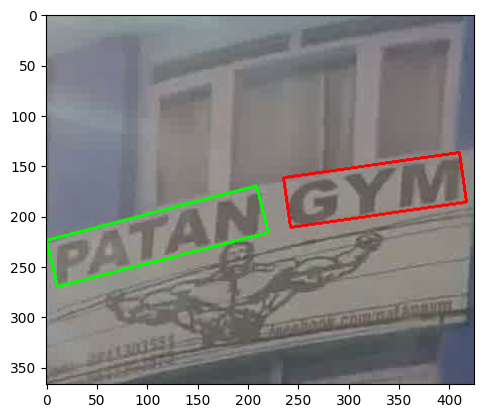

In [7]:
img = cv2.imread('images/odd_5.jpg')
image = img.copy()
boxes = craft.detect_text(img)['boxes']
imgc = img.copy()

angled_boxes = []
for box in boxes:
    if len(box) >= 3:
        # Convert box points to numpy array for easier manipulation
        box_points = np.array(box, dtype=np.int32).reshape(-1, 2)

        # Calculate the centroid of the polygon
        centroid = np.mean(box_points, axis=0)

        # Calculate angles from the centroid to the vertices
        angles = [math.atan2(p[1] - centroid[1], p[0] - centroid[0]) for p in box_points]

        # Calculate average angle
        avg_angle = sum(angles) / len(angles)

        # Determine the threshold based on your specific case
        threshold = math.pi / 4  # 45 degrees

        # Compare the average angle with the threshold to determine orientation
        is_clockwise = avg_angle > threshold

        # If clockwise, reverse the points
        if is_clockwise:
            box_points = box_points[::-1]

        # Calculate the minimum bounding rectangle
        rotated_rect = cv2.minAreaRect(box_points)
        box_vertices = cv2.boxPoints(rotated_rect)
        box_vertices = np.int0(box_vertices)
        angled_boxes.append(box_vertices)

        # Draw the rotated rectangle
        cv2.drawContours(imgc, [box_vertices], 0, (255, 0, 0), 2)

largest_contour = max(angled_boxes, key=cv2.contourArea)
cv2.drawContours(imgc, [largest_contour], 0, (0, 255, 0), 2)
sorted_contour = clockwise(largest_contour)

plt.imshow(imgc)

print(largest_contour)
# check_orientation = orientation_t(sorted_contour)

# print(check_orientation)
print(sorted_contour)

_,_,angle = cv2.minAreaRect(sorted_contour)

print(f'angle before : {angle}')

if angle > 45:
    # angle = angle -  90

    x1, y1 = sorted_contour[0]
    x2, y2 = sorted_contour[3]
    if x2 - x1 != 0:
        slope = (y2 - y1) / (x2 - x1)
        angle_radians = np.arctan(slope)
        angle = np.degrees(angle_radians)
    else:
        angle = 90

print(f'angle after : {angle}')
height, width = img.shape[:2]
center = (width // 2, height // 2)
imgc = cv2.drawContours(imgc,[sorted_contour],0,(0,255,0),2)
if angle !=90:
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
elif angle in range(80,100):
    rotated_image = image.copy()

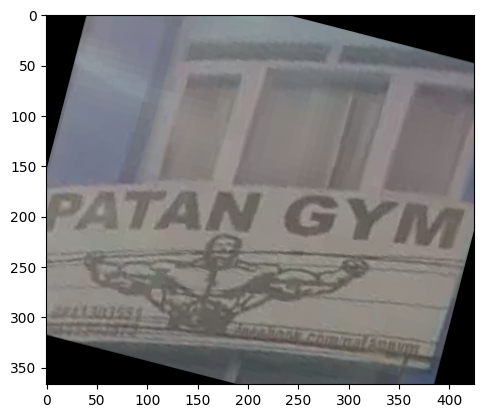

In [8]:
plt.imshow(rotated_image)
plt.show()

In [9]:
# img = cv2.imread('images/odd_1.jpg')
# image = img.copy()
# boxes = craft.detect_text(img)['boxes']
# imgc = img.copy()

# angled_boxes = []
# for box in boxes:
#     if len(box) >= 3:
#         # Convert box points to numpy array for easier manipulation
#         box_points = np.array(box, dtype=np.int32).reshape(-1, 2)

#         # Calculate the centroid of the polygon
#         centroid = np.mean(box_points, axis=0)

#         # Calculate angles from the centroid to the vertices
#         angles = [math.atan2(p[1] - centroid[1], p[0] - centroid[0]) for p in box_points]

#         # Calculate average angle
#         avg_angle = sum(angles) / len(angles)

#         # Determine the threshold based on your specific case
#         threshold = math.pi / 4  # 45 degrees

#         # Compare the average angle with the threshold to determine orientation
#         is_clockwise = avg_angle > threshold

#         # If clockwise, reverse the points
#         if is_clockwise:
#             box_points = box_points[::-1]

#         # Calculate the minimum bounding rectangle
#         rotated_rect = cv2.minAreaRect(box_points)
#         box_vertices = cv2.boxPoints(rotated_rect)
#         box_vertices = np.int0(box_vertices)
#         angled_boxes.append(box_vertices)

#         # Draw the rotated rectangle
#         cv2.drawContours(img, [box_vertices], 0, (255, 0, 0), 2)

# plt.imshow(img)

# largest_contour = max(angled_boxes, key=cv2.contourArea)
# print(largest_contour)
# check_orientation = orientation(largest_contour)

# if check_orientation == 'counter_clockwise':
#     # Calculate the angle for counterclockwise orientation
#     largest_contour = order_contour_anti_clockwise(largest_contour)
#     print(largest_contour)
#     print('counter_clockwise')
#     orientation(largest_contour)

#     _,_,angle = cv2.minAreaRect(largest_contour)
#     print(f'ag : {angle}')
#     # if angle < -45:
#     #     print('here')
#     #     x1, y1 = largest_contour[1]
#     #     x2, y2 = largest_contour[0]
#     #     if x2 - x1 != 0:
#     #         slope = (y2 - y1) / (x2 - x1)
#     #         angle_radians = np.arctan(slope)
#     #         angle = np.degrees(angle_radians)
#     #     else:
#     #         angle = 90
#     if angle > 45:
#         # angle = angle -  90

#         x1, y1 = largest_contour[3]
#         x2, y2 = largest_contour[0]
#         if x2 - x1 != 0:
#             slope = (y2 - y1) / (x2 - x1)
#             angle_radians = np.arctan(slope)
#             angle = np.degrees(angle_radians)
#         else:
#             angle = 90
# else:
#     print('clockwise')
#     # Calculate the angle for clockwise orientation
#     largest_contour = order_contour_clockwise(largest_contour)
#     print(largest_contour)
#     _,_,angle = cv2.minAreaRect(largest_contour)
#     print(f'before {angle}')
#     if angle > 45:
#         print('here')
#         # angle = angle -  90

#         x1, y1 = largest_contour[3]
#         x2, y2 = largest_contour[0]
#         if x2 - x1 != 0:
#             slope = (y2 - y1) / (x2 - x1)
#             angle_radians = np.arctan(slope)
#             angle = np.degrees(angle_radians)
#         else:
#             angle = 90

# print(f'angle: {angle}')
# # print(f'angle_degrees : {angle_degrees}')

# height, width = img.shape[:2]
# center = (width // 2, height // 2)
# imgc = cv2.drawContours(imgc,[largest_contour],0,(0,255,0),2)
# if angle != 90:
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
#     rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
# else:
#     rotated_image = image.copy()